# Transporte Interestadual - Brasil

Análise do fluxo de transporte de ônibus interestadual no Brasil entre os anos de **2019** e **2020**

### Importação das dependências

Importação das seguintes dependências para realização do projeto:
- Pandas
- Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

### Leitura dos dados

Leitura dos arquivos **csv** utilizados para análise.

In [3]:
transportationData = pd.read_csv("data/road-transport-brazil.csv", sep=";", decimal=',')
transportationData.head()

,codigo_viagem,empresa,nu_linha,onibus,tipo_viagem,sentido_linha,in_transbordo,origem,origem_uf,destino,destino_uf,lat,lon,pdop,data_viagem_programada,data_inicio_viagem,data_fim_viagem
0,554e2d76,7980c0ae,83ed87ea,3b3307d2,regular,volta,não,TRES RIOS,RJ,JUIZ DE FORA,MG,-21.738728,-43.374210,0.0,2019-01-01 05:30:00,2019-01-01 05:28:27,2019-01-01 06:52:04
1,c5f130e7,7980c0ae,83ed87ea,651283f4,regular,volta,não,TRES RIOS,RJ,JUIZ DE FORA,MG,-22.116059,-43.198193,0.0,2019-01-01 05:30:00,2019-01-01 05:30:01,2019-01-01 06:53:37
2,09644e23,7980c0ae,83ed87ea,3b3307d2,regular,ida,não,TRES RIOS,RJ,JUIZ DE FORA,MG,-22.116022,-43.198081,0.0,2019-01-01 07:30:00,2019-01-01 07:29:41,2019-01-01 08:52:25
3,7e637eb5,7980c0ae,83ed87ea,651283f4,regular,volta,não,TRES RIOS,RJ,JUIZ DE FORA,MG,-21.738783,-43.374027,0.0,2019-01-01 07:30:00,2019-01-01 07:30:50,2019-01-01 08:58:33
4,99db53b2,7980c0ae,83ed87ea,8ddac9ca,regular,ida,não,TRES RIOS,RJ,JUIZ DE FORA,MG,-22.116213,-43.200547,0.0,2019-01-01 08:45:00,2019-01-01 08:32:36,2019-01-01 10:14:54


Demonstração da estrutura de organização dos dados no DataSet

In [68]:
transportationData.head()

,codigo_viagem,empresa,nu_linha,onibus,tipo_viagem,sentido_linha,in_transbordo,origem,origem_uf,destino,destino_uf,lat,lon,pdop,data_viagem_programada,data_inicio_viagem,data_fim_viagem
0,554e2d76,7980c0ae,83ed87ea,3b3307d2,regular,volta,não,TRES RIOS,RJ,JUIZ DE FORA,MG,"-21,738728","-43,37421",0,2019-01-01 05:30:00,2019-01-01 05:28:27,2019-01-01 06:52:04
1,c5f130e7,7980c0ae,83ed87ea,651283f4,regular,volta,não,TRES RIOS,RJ,JUIZ DE FORA,MG,"-22,116059","-43,198193",0,2019-01-01 05:30:00,2019-01-01 05:30:01,2019-01-01 06:53:37
2,09644e23,7980c0ae,83ed87ea,3b3307d2,regular,ida,não,TRES RIOS,RJ,JUIZ DE FORA,MG,"-22,116022","-43,198081",0,2019-01-01 07:30:00,2019-01-01 07:29:41,2019-01-01 08:52:25
3,7e637eb5,7980c0ae,83ed87ea,651283f4,regular,volta,não,TRES RIOS,RJ,JUIZ DE FORA,MG,"-21,738783","-43,374027",0,2019-01-01 07:30:00,2019-01-01 07:30:50,2019-01-01 08:58:33
4,99db53b2,7980c0ae,83ed87ea,8ddac9ca,regular,ida,não,TRES RIOS,RJ,JUIZ DE FORA,MG,"-22,116213","-43,200547",0,2019-01-01 08:45:00,2019-01-01 08:32:36,2019-01-01 10:14:54


Listagem de colunas

In [69]:
transportationData.columns.values

array(['codigo_viagem', 'empresa', 'nu_linha', 'onibus', 'tipo_viagem',
       'sentido_linha', 'in_transbordo', 'origem', 'origem_uf', 'destino',
       'destino_uf', 'lat', 'lon', 'pdop', 'data_viagem_programada',
       'data_inicio_viagem', 'data_fim_viagem'], dtype=object)

### Limpeza dos dados

Limpeza de linhas com dados vazios e remoção das seguintes colunas que não serão tratadas no processamento:
- codigo_viagem
- empresa
- nu_linha
- onibus
- in_transbordo
- pdop


In [4]:
transportationData.drop(['codigo_viagem', 'empresa', 'nu_linha', 'onibus', 'in_transbordo', 'pdop'], axis=1, inplace=True)
transportationData.head()

,tipo_viagem,sentido_linha,origem,origem_uf,destino,destino_uf,lat,lon,data_viagem_programada,data_inicio_viagem,data_fim_viagem
0,regular,volta,TRES RIOS,RJ,JUIZ DE FORA,MG,-21.738728,-43.374210,2019-01-01 05:30:00,2019-01-01 05:28:27,2019-01-01 06:52:04
1,regular,volta,TRES RIOS,RJ,JUIZ DE FORA,MG,-22.116059,-43.198193,2019-01-01 05:30:00,2019-01-01 05:30:01,2019-01-01 06:53:37
2,regular,ida,TRES RIOS,RJ,JUIZ DE FORA,MG,-22.116022,-43.198081,2019-01-01 07:30:00,2019-01-01 07:29:41,2019-01-01 08:52:25
3,regular,volta,TRES RIOS,RJ,JUIZ DE FORA,MG,-21.738783,-43.374027,2019-01-01 07:30:00,2019-01-01 07:30:50,2019-01-01 08:58:33
4,regular,ida,TRES RIOS,RJ,JUIZ DE FORA,MG,-22.116213,-43.200547,2019-01-01 08:45:00,2019-01-01 08:32:36,2019-01-01 10:14:54


Nova listagem de colunas

In [71]:
transportationData.columns.values

array(['tipo_viagem', 'sentido_linha', 'origem', 'origem_uf', 'destino',
       'destino_uf', 'lat', 'lon', 'data_viagem_programada',
       'data_inicio_viagem', 'data_fim_viagem'], dtype=object)

Contagem dos valores
*(linhas, colunas)*

In [72]:
transportationData.shape

(1308793, 11)

Limpeza dos dados vazios e nova contagem dos valores

In [28]:
transportationData.dropna(axis=0)
transportationData.shape

(1308793, 11)

### Conversão de dados

Parse dos dados que serão necessários para a análise. Conversão para formato correto

In [74]:
transportationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308793 entries, 0 to 1308792
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   tipo_viagem             1308793 non-null  object
 1   sentido_linha           1308793 non-null  object
 2   origem                  1308793 non-null  object
 3   origem_uf               1308793 non-null  object
 4   destino                 1308793 non-null  object
 5   destino_uf              1308793 non-null  object
 6   lat                     1308793 non-null  object
 7   lon                     1308793 non-null  object
 8   data_viagem_programada  1308793 non-null  object
 9   data_inicio_viagem      1308793 non-null  object
 10  data_fim_viagem         1308793 non-null  object
dtypes: object(11)
memory usage: 109.8+ MB


Convertendo para **datetime** dados de data que estão como **object**

In [9]:
transportationData['data_viagem_programada'] = pd.to_datetime(transportationData['data_viagem_programada'])
transportationData['data_inicio_viagem'] = pd.to_datetime(transportationData['data_inicio_viagem'])
transportationData['data_fim_viagem'] = pd.to_datetime(transportationData['data_fim_viagem'])
transportationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308793 entries, 0 to 1308792
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   tipo_viagem             1308793 non-null  object        
 1   sentido_linha           1308793 non-null  object        
 2   origem                  1308793 non-null  object        
 3   origem_uf               1308793 non-null  object        
 4   destino                 1308793 non-null  object        
 5   destino_uf              1308793 non-null  object        
 6   lat                     1308793 non-null  float64       
 7   lon                     1308793 non-null  float64       
 8   data_viagem_programada  1308793 non-null  datetime64[ns]
 9   data_inicio_viagem      1308793 non-null  datetime64[ns]
 10  data_fim_viagem         1308793 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage: 109.8+ MB


### Quantificação dos dados

Análise dos seguintes grupos:
- Viagens por UF: **Origem** e **Destino**
- Viagens por Cidade: **Origem** e **Destino**
- Viagens realizadas dentro do próprio estado *(uf)*

Contagem de viagens por **UF de Origem**

In [76]:
(transportationData['origem_uf']).value_counts().sort_index()

AC         2
AL     13663
AM     11373
BA     81926
CE     43577
DF     49372
ES     81859
GO     67434
MA     19803
MG    218387
MS     34162
MT     18894
PA      8380
PB     31220
PE     11822
PI       661
PR    204032
RJ    104658
RN      3217
RO      8282
RS     44701
SC     71986
SE      3881
SP    175501
Name: origem_uf, dtype: int64

Contagem de viagens por **UF de Destino**

In [77]:
(transportationData['destino_uf']).value_counts().sort_index()

AC      6184
AL       532
AM      2896
BA     18587
CE      2569
DF      4745
ES     24164
GO     28705
MA      4916
MG    208403
MS     24539
MT     29042
PA     11306
PB      5599
PE     53084
PI     38247
PR     49504
RJ    196524
RN     21192
RO      7646
RR     10867
RS     57424
SC     96407
SE     11816
SP    380152
TO     13743
Name: destino_uf, dtype: int64

Contagem de viagens por **Cidade de Origem**

In [78]:
(transportationData['origem']).value_counts().sort_index()

ACAILANDIA                2020
AFONSO CLAUDIO               3
AGUA BOA                   985
AGUA DOCE DO MARANHAO     1517
AGUAS DA PRATA           11847
                         ...  
VITORIA                  32256
VITORIA DA CONQUISTA      9211
VOLTA REDONDA            13903
WENCESLAU BRAZ            2586
XIQUE-XIQUE                262
Name: origem, Length: 407, dtype: int64

Contagem de viagens por **Cidade de Destino**

In [ ]:
(transportationData['destino']).value_counts().sort_index()

Viagens realizadas **Dentro do próprio estado** *(UF de origem igual a UF de destino)*

In [79]:
same_origin_destination = transportationData[transportationData['origem_uf'] == transportationData['destino_uf']]
same_origin_destination['origem_uf'].value_counts().sort_index()

MG    1919
Name: origem_uf, dtype: int64

Número de viagens por ano divididos por **UF de origem**

In [81]:
selectedYear = 2019
trip_by_year = transportationData[transportationData['data_viagem_programada'].dt.year == selectedYear]
trip_by_year['origem_uf'].value_counts().sort_index()

AC         2
AL      9476
AM      8511
BA     65372
CE     33642
DF     35658
ES     65666
GO     53391
MA     15545
MG    172401
MS     27182
MT     15261
PA      6651
PB     24367
PE      9036
PI       499
PR    164140
RJ     82883
RN      2396
RO      6398
RS     35181
SC     57017
SE      2629
SP    138154
Name: origem_uf, dtype: int64

### Agrupamento de dados

Utilização do groupby para exploração do DataSet

Agrupamento de viagens relacionando **UF de Origem** e **UF de Destino**

In [82]:
transportationData.groupby(['origem_uf', 'destino_uf']).tipo_viagem.count()

origem_uf  destino_uf
AC         GO                2
AL         BA             3032
           CE              582
           PA              348
           PB             1267
                         ...  
SP         PR            16454
           RJ            69213
           RS                1
           SC             1735
           TO              337
Name: tipo_viagem, Length: 200, dtype: int64

Agrupamento de viagens relacionando **Cidade de Origem** e **Cidade de Destino**, adicionando as respectivas UFs como referência

In [30]:
transportationData.groupby(['origem_uf', 'origem', 'destino_uf', 'destino']).tipo_viagem.count()

origem_uf  origem      destino_uf  destino       
AC         RIO BRANCO  GO          GOIANIA              2
AL         ARAPIRACA   BA          SALVADOR             9
                       PE          RECIFE              39
                       SP          SAO PAULO          720
           MACEIO      BA          PAULO AFONSO       567
                                                     ... 
SP         SAO PAULO   SC          FLORIANOPOLIS      596
                                   ITAJAI              15
                                   ITAPEMA           1124
                       TO          PALMAS             337
           SOROCABA    MG          BELO HORIZONTE    1449
Name: tipo_viagem, Length: 1217, dtype: int64

### Demonstração Gráfica

Organização/demonstração dos dados de forma gráfica

Número de viagens por **mês/ano**

<AxesSubplot:xlabel='data_viagem_programada,data_viagem_programada'>

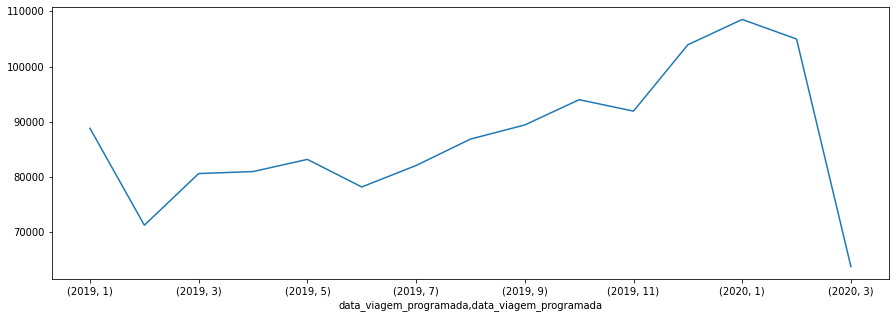

In [14]:
transportationData.groupby([transportationData['data_viagem_programada'].dt.year, transportationData['data_viagem_programada'].dt.month])['tipo_viagem'].count().plot(figsize=(15,5))

Representação gráfica de **estados de destino** e **origem**

<AxesSubplot:title={'center':'Viagens [DESTINO]'}, xlabel='destino_uf'>

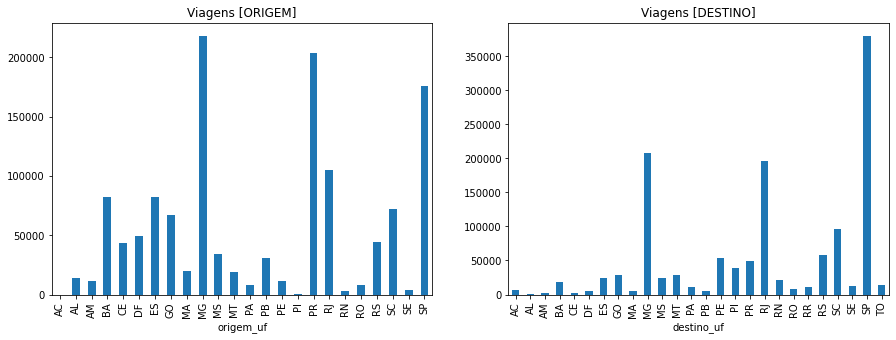

In [37]:
fig,ax = mtp.subplots(nrows=1, ncols=2, figsize=(30,10))

transportationData.groupby(['origem_uf'])['tipo_viagem'].count().plot.bar(figsize=(15,5), ax=ax[0],
                                                                            title='Viagens [ORIGEM]')

transportationData.groupby(['destino_uf'])['tipo_viagem'].count().plot.bar(figsize=(15,5), ax=ax[1],
                                                                            title='Viagens [DESTINO]')

Listagens das 10 cidades para **origem** e **destino**

<AxesSubplot:title={'center':'TOP 10 - CIDADES DE DESTINO'}, ylabel='destino'>

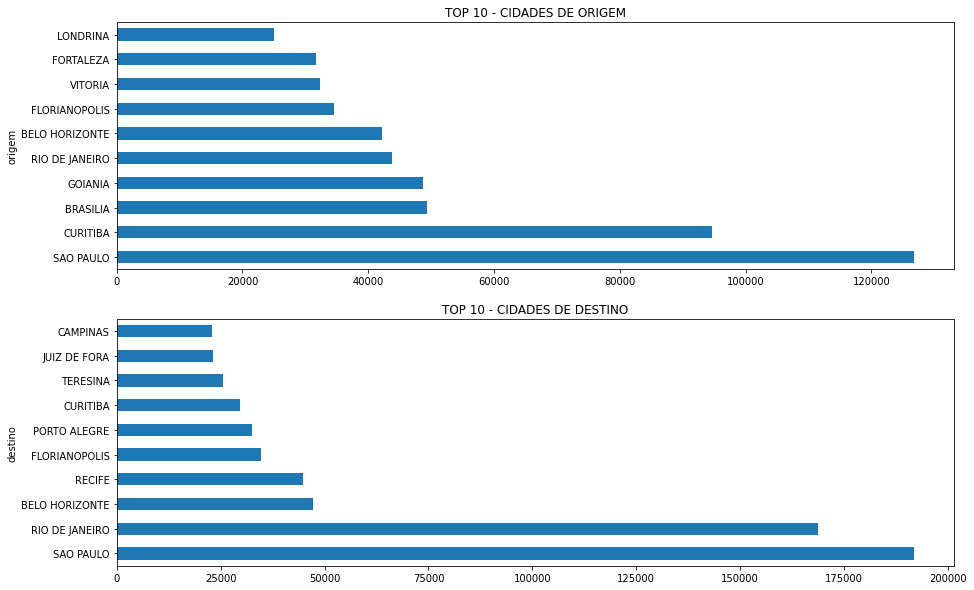

In [77]:
fig,ax = mtp.subplots(nrows=2, ncols=1, figsize=(15,20))

transportationData.groupby(['origem'])['tipo_viagem'].count().sort_values(ascending=False).head(10).plot.barh(figsize=(15,10), ax=ax[0],
                                                                                                                title='TOP 10 - CIDADES DE ORIGEM')

transportationData.groupby(['destino'])['tipo_viagem'].count().sort_values(ascending=False).head(10).plot.barh(figsize=(15,10), ax=ax[1],
                                                                                                                title='TOP 10 - CIDADES DE DESTINO')

In [12]:
origin = transportationData.groupby(['origem_uf']).tipo_viagem.count().sort_index()
destiny = transportationData.groupby(['destino_uf']).tipo_viagem.count().sort_index()

In [78]:
originDf = pd.DataFrame(data={'uf': origin.index, 'viagens_origem': origin.values})
destinyDf = pd.DataFrame(data={'uf': destiny.index, 'viagens_destino': destiny.values})

In [81]:
originDestinyDf = pd.merge(left=originDf ,right=destinyDf, how='inner', on='uf')

<AxesSubplot:title={'center':'SUL'}>

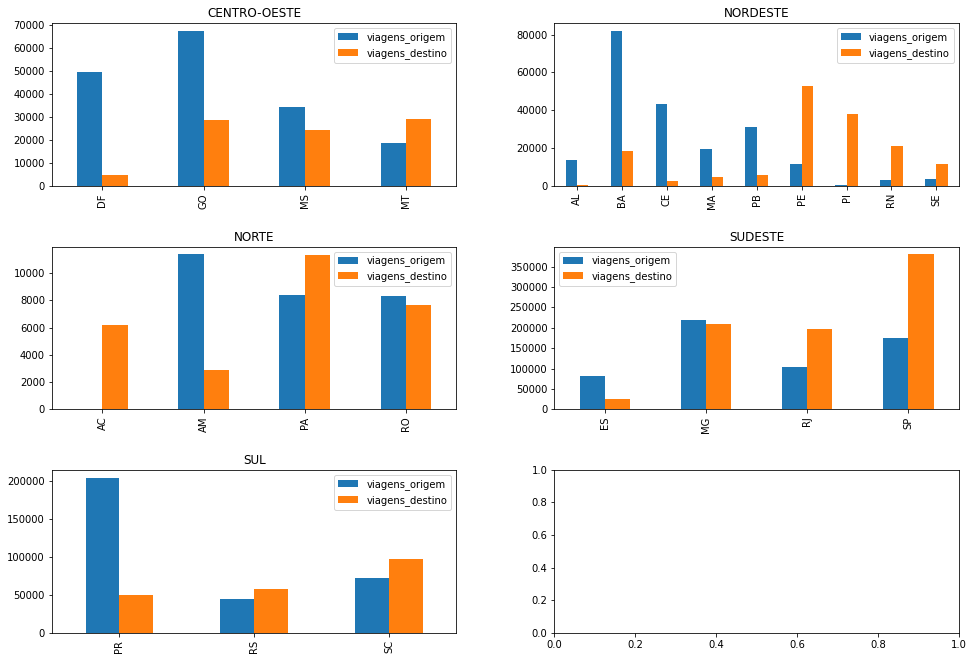

In [159]:
fig,ax = mtp.subplots(nrows=3, ncols=2, figsize=(20,20))
fig.tight_layout(pad=10.0)

originDestinyDf[originDestinyDf['uf'].isin({'DF', 'GO', 'MT', 'MS'})].plot.bar(
    figsize=(20, 10), x='uf', ax=ax[0,0],
    title='CENTRO-OESTE', xlabel=""
)

originDestinyDf[originDestinyDf['uf'].isin({'AL','BA','CE','MA','PB','PE','PI','RN','SE'})].plot.bar(
    figsize=(20, 10), x='uf', ax=ax[0,1],
    title='NORDESTE', xlabel=""
)

originDestinyDf[originDestinyDf['uf'].isin({'AC','AP','AM','PA','RO','RR','TO'})].plot.bar(
    figsize=(15, 10), x='uf', ax=ax[1,0],
    title='NORTE', xlabel=""
)

originDestinyDf[originDestinyDf['uf'].isin({'ES','MG','RJ','SP'})].plot.bar(
    figsize=(15, 10), x='uf', ax=ax[1,1],
    title='SUDESTE', xlabel=""
)

originDestinyDf[originDestinyDf['uf'].isin({'PR','RS','SC'})].plot.bar(
    figsize=(15, 10), x='uf', ax=ax[2,0],
    title='SUL', xlabel=""
)

------------------------------------------------------------
### Quebra de dados em **Treino/Teste**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
coluna_machine = ['lat', 'lon']
coluna_machine_p = transportationData.filter(items= coluna_machine)

In [7]:
x = coluna_machine_p.drop(columns= 'lon')
y = coluna_machine_p['lon']
print (x.shape, y.shape)

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=123)

(1308793, 1) (1308793,)


In [8]:
print(f"Tamanho de X_train: {x_train.shape}")
print(f"Tamanho de X_test: {x_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (916155, 1)
Tamanho de X_test: (392638, 1)
Tamanho de y_train: (916155,)
Tamanho de y_test: (392638,)


### Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [10]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [11]:
clf.fit(x_train, y_train)

LinearRegression()

In [12]:
clf.score(x_test, y_test)

0.1784321021636598